In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pl.read_csv("/kaggle/input/organizations-csv/crunchbase_merged.csv") #using the dataset created by joining both tables relevant columns 
df.head()

uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,description,clean_description
str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str
"""e1393508-30ea-8a36-3f96-dd3226…","""Wetpaint""","""organization""","""wetpaint""","""https://www.crunchbase.com/org…",167617,"""2007-05-25 13:51:27""","""2023-08-01 00:01:37""",null,"""company""","""wetpaint.com""","""http://www.wetpaint.com/""","""USA""","""NY""","""New York""","""New York""","""902 Broadway 11th Floor New""","""10010""","""acquired""","""Wetpaint offers an online soci…","""Publishing,Social Media,Social…","""Content and Publishing,Interne…",3,39750000,39750000,"""USD""","""2005-06-01""","""2008-05-19""",null,"""51-100""","""info@wetpaint.com""","""206-859-6300""","""https://www.facebook.com/Wetpa…","""https://www.linkedin.com/compa…","""https://twitter.com/wetpainttv""","""https://images.crunchbase.com/…",null,null,null,"""company""",null,"""Wetpaint is a technology platf…","""wetpaint is a technology platf…"
"""bf4d7b0e-b34d-2fd8-d292-6049c4…","""Zoho""","""organization""","""zoho""","""https://www.crunchbase.com/org…",168555,"""2007-05-26 02:30:28""","""2023-10-19 07:46:32""","""Zoho Corporation Pvt. Ltd.""","""investor,company""","""zoho.com""","""https://www.zoho.com""","""USA""","""CA""","""California""","""Pleasanton""","""4141 Hacienda Dr""","""94588""","""operating""","""Zoho offers a suite of busines…","""Cloud Computing,Collaboration,…","""Administrative Services,Apps,I…",0,0,null,null,"""1996-03-17""","""0""",null,"""10000+""","""sales@zohocorp.com""","""1800 103 1123 /1800 572 3535""","""http://www.facebook.com/zoho""","""https://www.linkedin.com/compa…","""http://twitter.com/zoho""","""https://images.crunchbase.com/…",null,null,null,"""company""",2,"""Zoho offers a suite of busines…","""zoho offers a suite of busines…"
"""5f2b40b8-d1b3-d323-d81a-b7a8e8…","""Digg""","""organization""","""digg""","""https://www.crunchbase.com/org…",25570,"""2007-05-26 03:03:23""","""2024-01-26 08:06:40""","""Digg Holdings, LLC""","""company""","""digg.com""","""http://www.digg.com""","""USA""","""NY""","""New York""","""New York""",null,null,"""acquired""","""Digg Inc. operates a website t…","""Internet,Social Media,Social N…","""Internet Services,Media and En…",6,49000000,49000000,"""USD""","""2004-10-11""","""2016-09-13""",null,"""51-100""","""feedback@digg.com""",null,"""http://www.facebook.com/digg""","""http://www.linkedin.com/compan…","""http://twitter.com/digg""","""https://images.crunchbase.com/…",null,null,null,"""company""",null,"""Digg Inc. operates a website t…","""digg inc operates a website th…"
"""f4d5ab44-058b-298b-ea81-380e6e…","""Omidyar Network""","""organization""","""omidyar-network""","""https://www.crunchbase.com/org…",30539,"""2007-05-26 03:21:34""","""2023-08-30 02:27:06""",null,"""investor,company""","""omidyar.com""","""http://www.omidyar.com""","""USA""","""CA""","""California""","""Redwood City""","""1991 Broadway Suite 200""","""94063""","""operating""","""Omidyar Network is an investme…","""Enterprise Software,Financial …","""Financial Services,Lending and…",0,0,null,null,"""2004-01-01""","""0""",null,"""101-250""","""info@omidyar.com""","""650.482.2500""","""http://www.facebook.com/Omidya…","""http://www.linkedin.com/compan…","""http://twitter.com/OmidyarNetw…","""https://images.crunchbase.com/…",null,null,null,"""investor""",62,"""Pierre Omidyar, the founder of…","""pierre omidyar the founder of …"
"""df662812-7f97-0b43-9d3e-12f64f…","""Meta""

In [4]:
# Count nulls in the column
null_count = df["clean_description"].null_count()
print(null_count) 

0


# EMBEDDING

In [5]:
# Embedding the description using open source model
from sentence_transformers import SentenceTransformer

# Load 384D vectors model
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')  # Auto-uses GPU if available

# Convert descriptions to embeddings
descriptions = df["clean_description"].to_list()

# Encode with progress bar and safe batch size
embeddings = model.encode(
    descriptions,
    batch_size=32, 
    show_progress_bar=True,
    convert_to_numpy=True
)

print(f"Embeddings shape: {embeddings.shape}")  # (num_companies, 384)

2025-08-31 10:21:28.633849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756635688.968603      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756635689.060095      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/102804 [00:00<?, ?it/s]

Embeddings shape: (3289728, 384)


**This model was used as it is most ideal for our situation due to several reasons:**
* Tried all-mpnet-base-v2 model which claims 100% accuracy, but it was very slow and couldn't convert embeddings in sufficient time as data rows were in huge amount so, all-MiniLM-L6-v2 turned out to be more efficient for our case with only a minimal drop of accuracy as it still provides 85% accuracy
* 2x faster than 768D model
* UMAP Compatibility: Lower dimensionality (384D → 2D) is faster and less noisy than reducing from 768D.
* Clustering Ready:
Agglomerative clustering on 384D vectors is computationally cheaper than 768D.

In [6]:
# Check the first embedding
print(embeddings[0][:5])  # First 5 dimensions of the first description

[-0.00510044 -0.04308825  0.02186342  0.01586073  0.02461611]


In [ ]:
# Saving embeddings as pickle file 
import pickle

# If embeddings are a numpy array
with open("embeddings.pkl", "wb") as f:
    pickle.dump(embeddings, f)

In [ ]:
# Moving it to output directory
import os
os.rename("embeddings.pkl", "/kaggle/working/embeddings.pkl")

In [ ]:
# loading pickle file again

with open("/kaggle/input/your-previous-notebook/embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)


**Inability to download embeddings vector in pickle or binary (both formats tried):**
* When file appears in output sidebar, I keep on clicking the download button but it doesn't work maybe because embeddings are large almost greater than 5GB.
* Second way is to save and commit the notebook first, then save. But in my case, always a failure occurs in saving and making the final commit maybe due to huge size of embeddings.

# UMAP DIMENSIONAITY REDUCTION

In [7]:
import umap
from sklearn.utils import resample

# Step 1: Take a manageable sample to fit
sample_size = 10000 # Whole dataset is too huge for Kaggle's RAM to process so using a sample subset which is enough for UMAP and clustering purposes
sample_embeddings = resample(embeddings, n_samples=sample_size, random_state=42)


In [8]:
# Step 2: Fit UMAP on this sample
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42).fit(sample_embeddings)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
# Step 3: Transform the sample dataset having 10K rows
reduced_embeddings = umap_model.transform(sample_embeddings)

In [10]:
print(reduced_embeddings.shape)

(10000, 2)


In [11]:
# Check the first embedding
print(reduced_embeddings[0:5])  # First 5 embeddings

[[  7.334237   12.706335 ]
 [-11.780745    9.773249 ]
 [  8.19135    11.152456 ]
 [ -9.446748    8.379087 ]
 [ -8.290074    6.3730965]]


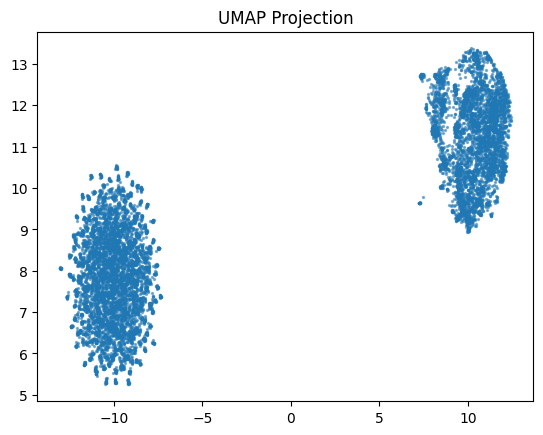

In [12]:
import matplotlib.pyplot as plt

plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], s=2, alpha=0.5)
plt.title("UMAP Projection")
plt.show()

In [ ]:
np.save("reduced_embeddings.npy", reduced_embeddings)


# CLUSTERING

In [14]:
import numpy as np
import pandas as pd

In [15]:
import umap

In [16]:
# Random number generator
rng = np.random.default_rng(42)  # fixed seed 42 for reproducing same random numbers everytime
sample_idx = rng.choice(len(df), size=10_000, replace=False)   # pick 10k rows

In [17]:
# Sample 10K rows metadata by dropping rows other than the ones selected in sample_idx in dataframe
# Select rows by index
sample_meta = df[sample_idx]  

# Reset index
sample_meta = sample_meta.with_row_count("index")


/tmp/ipykernel_36/2772222323.py:6: DeprecationWarning: `DataFrame.with_row_count` is deprecated. Use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  sample_meta = sample_meta.with_row_count("index")


In [18]:
# Recompute UMAP on the 10K rows sample 
reduced_embeddings = umap.UMAP(n_neighbors=15, n_components=2, random_state=42).fit_transform(embeddings[sample_idx])

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
print(reduced_embeddings.shape)

(10000, 2)


In [20]:
print(reduced_embeddings[0:5])

[[18.175398    5.589433  ]
 [-1.039656    2.193227  ]
 [-3.1647544  -0.93451107]
 [-0.16916049  1.4065388 ]
 [19.808758    6.6467257 ]]


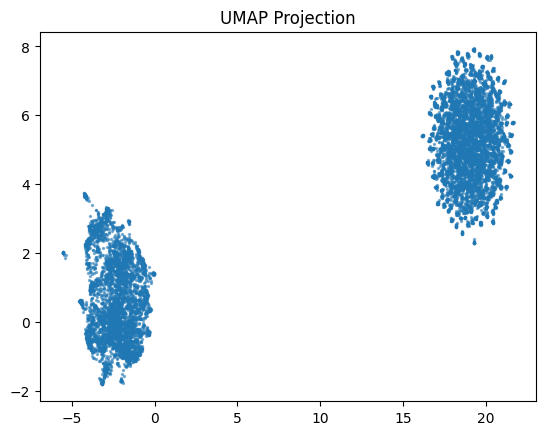

In [21]:
import matplotlib.pyplot as plt

plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], s=2, alpha=0.5)
plt.title("UMAP Projection")
plt.show()

In [ ]:
np.save("sample_idx.npy", np.array(sample_idx, dtype=np.int64))

In [ ]:
np.save("reduced_embeddings.npy", reduced_embeddings)


In [5]:
# Loading rduced_embeddings for use
import numpy as np

reduced_embeddings = np.load("/kaggle/input/organizations-csv/reduced_embeddings.npy")

print(reduced_embeddings.shape)   # Check dimensions
print(reduced_embeddings.dtype)   # Check data type

(10000, 2)
float32


In [ ]:
sample_idx = np.load("/kaggle/input/organizations-csv/sample_idx.npy")

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg_full = AgglomerativeClustering(
    n_clusters=None,         # Don't stop at any number of clusters
    distance_threshold=0.0,  # Build the full tree all the way to 1 cluster
    linkage="ward",          # Merge groups to keep them tight (low variance)
    metric="euclidean",      # Distance measure (Ward uses Euclidean)
    compute_full_tree=True,  # Make sure we really build the whole tree
    compute_distances=True   # Save the "height" of each merge
).fit(reduced_embeddings)

children  = agg_full.children_    # Which two groups were merged at each step
distances = agg_full.distances_   # How far apart they were when merged (merge height)
n_samples = reduced_embeddings.shape[0]

In [24]:
def _counts_for_children(children: np.ndarray, n_samples: int) -> np.ndarray:
    counts = np.zeros(children.shape[0], dtype=float)
    for i, (left, right) in enumerate(children):
        cnt = 0
        for child in (left, right):
            if child < n_samples:             # a single original company
                cnt += 1
            else:                             # a merged group we saw earlier
                cnt += counts[child - n_samples]
        counts[i] = cnt
    return counts

counts = _counts_for_children(children, n_samples)

# SciPy-style linkage: [left_id, right_id, merge_height, group_size]
Z = np.column_stack([children, distances, counts]).astype(float)


In [25]:
from scipy.cluster.hierarchy import fcluster

# Cut for 3 big groups (coarse labels 1..3)
coarse = fcluster(Z, t=3, criterion="maxclust")

# Cut for 10 smaller groups (fine labels 1..10)
fine = fcluster(Z, t=10, criterion="maxclust")

# Make labels start at 0 (0..K-1) if you prefer
coarse -= 1
fine   -= 1

In [26]:
df_check = pd.DataFrame({"coarse": coarse, "fine": fine})

# Each fine cluster should belong to exactly 1 coarse cluster
fine_to_coarse_counts = df_check.groupby("fine")["coarse"].nunique()
assert (fine_to_coarse_counts == 1).all()

# Create a mapping: fine_cluster_id -> its parent coarse_cluster_id
fine_to_coarse_map = (
    df_check.groupby("fine")["coarse"]
    .agg(lambda s: s.mode().iloc[0])   # the (only) coarse parent
    .to_dict()
)


In [27]:
df_check.head()

,coarse,fine
0,2,7
1,0,3
2,0,1
3,0,3
4,1,4


In [28]:
print(fine_to_coarse_map) # Checking consistency of mapping fine clusters to coarse

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2}


In [29]:
assert len(coarse) == sample_meta.height == len(fine)

sample_meta = sample_meta.with_columns([
    pl.Series("coarse_cluster", coarse),
    pl.Series("fine_cluster",   fine)
])

In [30]:
sample_meta.head(10)

index,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,description,clean_description,coarse_cluster,fine_cluster
u32,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,i32,i32
0,"""cc9a93c0-50ea-4aa5-8fc3-e251e5…","""The Corporate Group""","""organization""","""the-corporate-group""","""https://www.crunchbase.com/org…",1933769,"""2021-11-23 17:23:23""","""2021-11-25 04:47:50""",null,"""company""","""thecorporategroupllc.com""","""https://thecorporategroupllc.c…","""USA""","""MD""","""Maryland""","""Lanham""","""4485 Nicole Drive""","""20706""","""operating""","""The Corporate Group offers a r…","""Facility Management,Janitorial…","""Other,Real Estate""",0,0,null,null,"""-25567""","""0""",null,"""unknown""","""info@thecorporategroupllc.com""","""+1-301-877-2277""","""https://www.facebook.com/Corpo…",null,"""https://twitter.com/TheCorpora…","""https://images.crunchbase.com/…",null,null,null,"""company""",null,"""NO_DESCRIPTION""","""no_description""",2,7
1,"""9ee923bc-7377-4546-8d90-b76e4d…","""Livestock Genetic Services""","""organization""","""livestock-genetic-services""","""https://www.crunchbase.com/org…",2527267,"""2018-09-18 09:30:18""","""2018-09-18 09:30:18""",null,"""company""",null,"""""","""USA""","""VA""","""Virginia""","""Woodville""","""4432 Sperryville Pike""","""22749""","""acquired""","""Livestock Genetic Services, a …","""Animal Feed,Data Management""","""Agriculture and Farming,Data a…",0,0,null,null,"""-25567""","""0""",null,"""unknown""",null,"""+(540) 987-3385""",null,null,null,"""""",null,null,null,"""company""",null,"""Livestock Genetic Services, a …","""livestock genetic services a c…",0,3
2,"""4d3d81a3-8bc3-ea12-8462-ec0d3d…","""Perssy""","""organization""","""perssy""","""https://www.crunchbase.com/org…",3096067,"""2011-08-30 04:05:26""","""2018-02-12 23:44:48""",null,"""company""","""howdouseem.com""","""http://www.howdouseem.com""","""UNKNOWN""",null,null,null,null,null,"""closed""","""Design utility solutions""","""uncategorized""",null,0,0,null,null,"""2011-08-26""","""0""",null,"""1-10""","""howdouseem@yahoo.com""","""8479790352""",null,null,"""http://twitter.com/howdouseem""","""https://images.crunchbase.com/…",null,null,null,"""company""",null,"""Our website provides you with …","""our website provides you with …",0,1
3,"""ba102361-dbc8-4f77-bc77-481670…","""Casa Komos Beverage Group""","""organization""","""casa-komos-beverage-group""","""https://www.crunchbase.com/org…",46131,"""2021-02-24 06:12:40""","""2023-03-24 10:21:41""",null,"""company""","""ckbg.com""","""https://ckbg.com/""","""USA""","""NY""","""New York""","""New York""",null,null,"""operating""","""House Komos Beverage Group is …","""Food and Beverage""","""Food and Beverage""",2,15000000,15000000,"""USD""","""2019-01-01""","""2022-09-28""",null,"""1-10""",null,null,null,"""https://www.linkedin.com/compa…",null,"""https://images.crunchbase.com/…",null,null,null,"""company""",null,"""House Komos Beverage Group is …","""house komos beverage group is …",0,3
4,"""5f61dba8-f31f-4be6-9f89-290629…","""Moving""","""organization""","""moving-e4db""","""https://www.crunchbase.com/org…",940827,"""2021-12-08 10:34:35""","""2023-05-31 06:03:58""",null,"""company""","""moving.mx""","""https://moving.mx""","""MEX""",null,"""Distrito Federal""","""Alvaro Obregón""",null,null,"""operating""","""Moving provides moving, logist…","""Consumer,Logistics,Transportat…","""Other,Transportation""",0,0,null,null,"""-25567""","""0""",null,"""51-100""

In [31]:
sample_meta.write_csv("organizations_with_hierarchical_clusters.csv")

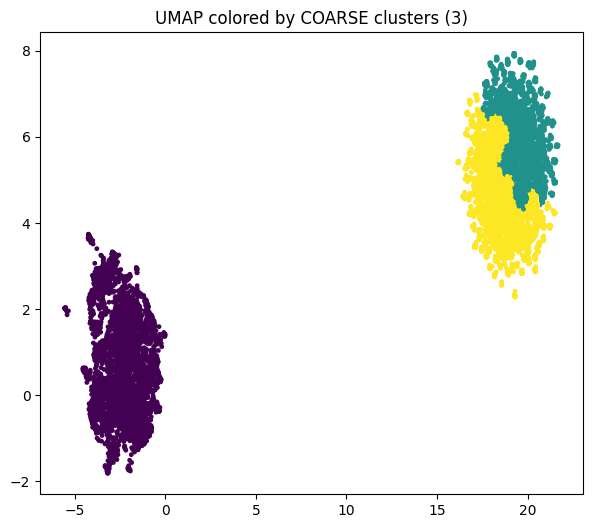

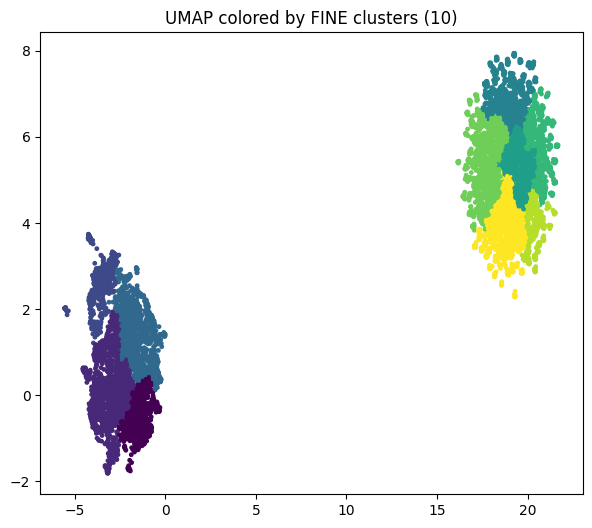

In [32]:
import matplotlib.pyplot as plt

# Color by coarse clusters
plt.figure(figsize=(7,6))
plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], c=coarse, s=6)
plt.title("UMAP colored by COARSE clusters (3)")
plt.show()

# Color by fine clusters
plt.figure(figsize=(7,6))
plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], c=fine, s=6)
plt.title("UMAP colored by FINE clusters (10)")
plt.show()


In [33]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

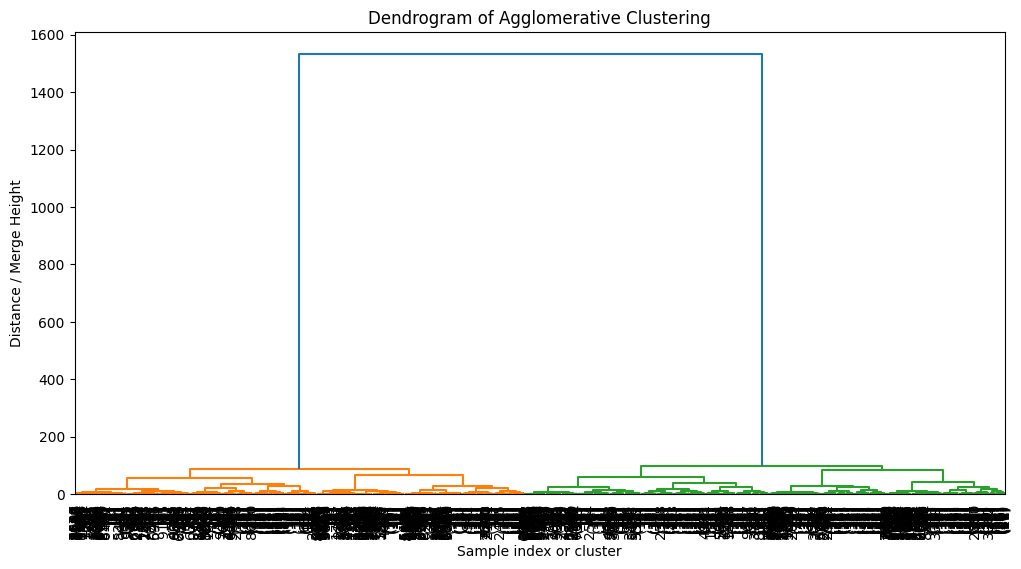

In [34]:
plt.figure(figsize=(12, 6))  # Adjust width/height as needed
dendrogram(
    Z,
    truncate_mode='level',   # 'level' shows only top levels for readability
    p=10,                    # Show only the top 10 merged clusters
    leaf_rotation=90.,       # Rotate leaf labels for clarity
    leaf_font_size=10.,      # Font size of leaf labels
    show_contracted=True      # Show how many leaves are hidden under each branch
)
plt.title("Dendrogram of Agglomerative Clustering")
plt.xlabel("Sample index or cluster")
plt.ylabel("Distance / Merge Height")
plt.show()


# LLM Labelling For Clusters

In [35]:
print(sample_meta['coarse_cluster'].unique())
print(sample_meta['fine_cluster'].unique())

shape: (3,)
Series: 'coarse_cluster' [i32]
[
	0
	1
	2
]
shape: (10,)
Series: 'fine_cluster' [i32]
[
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
]


In [36]:
# Group by cluster and concatenate the descriptions into one big text string
cluster_texts = (
    sample_meta
    .group_by("fine_cluster") 
    .agg([
        pl.col("clean_description").drop_nulls().str.concat(" ")
    ])
    .to_dict(as_series=False)
)

In [37]:
# We currently have:
# cluster_texts = {
#   "fine_cluster": [6, 3, 9, 0, ...],
#   "clean_description": ["big text for cluster 6", "big text for cluster 3", ...]
# }

# Converting it into a better format dict: { cluster_id: big_text }
cluster_ids   = cluster_texts["fine_cluster"]
cluster_bigtx = cluster_texts["clean_description"]

cluster_map = {cid: txt for cid, txt in zip(cluster_ids, cluster_bigtx)}

# Small peek (first 3 only, truncated)
for cid in list(cluster_map.keys())[:3]:
    print(f"Cluster {cid} -> {cluster_map[cid][:200]} ...\n")


Cluster 0 -> at the heart of lpr entertainment group lies lpr sound a record label that resonates with excellence established with the vision of nurturing musical talent and pushing the boundaries of sound lpr sou ...

Cluster 6 -> no_description no_description no_description no_description no_description no_description no_description no_description no_description no_description no_description no_description no_description no_de ...

Cluster 3 -> livestock genetic services a company that specializes in genetic evaluations and data management for cattle breeding organizations house komos beverage group is an alcoholic beverage company it offers ...



In [38]:
# Removing no_descriptions as we don't want TF-IDF to include this in keywords
import re

PLACEHOLDERS = {"no_description", "unknown", "null", "none", ""}

def normalize_text(text):
    if text is None:
        return ""
    # Ensure string
    text = str(text)
    # Lowercase for consistency
    text = text.lower()
    # Remove placeholder tokens
    for ph in PLACEHOLDERS:
        text = re.sub(rf"\b{re.escape(ph)}\b", " ", text)
    # Collapse whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

cluster_map = {cid: normalize_text(txt) for cid, txt in cluster_map.items()}

# Drop empty clusters after cleaning
cluster_map = {cid: txt for cid, txt in cluster_map.items() if len(txt) > 0}


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def top_tfidf_terms(text, top_n=20, ngram_range=(1,2)):
    """
    Returns the top-N tokens (unigrams+bigrams) by TF-IDF score for a single cluster's big text.
    """
    if not text.strip():
        return []
    vec = TfidfVectorizer(
        stop_words="english",
        ngram_range=ngram_range,
        max_features=5000  # large cap; we'll pick top_n by score
    )
    X = vec.fit_transform([text])  # shape (1, V)
    if X.shape[1] == 0:
        return []
    scores = X.toarray().ravel()
    terms  = vec.get_feature_names_out()
    top_idx = np.argsort(scores)[::-1][:top_n]
    return [terms[i] for i in top_idx]

# Build keyword summaries for each fine cluster
cluster_keywords = {
    cid: top_tfidf_terms(txt, top_n=20)
    for cid, txt in cluster_map.items()
}

# Quick peek
for cid in list(cluster_keywords.keys())[:5]:
    print(f"Cluster {cid}: {', '.join(cluster_keywords[cid])}")


Cluster 0: marketing, services, digital, website, company, media, online, platform, web, design, provides, development, business, social, mobile, content, users, solutions, new, clients
Cluster 3: services, products, company, provides, provide, offers, service, design, offer, customers, technology, industry, solutions, quality, systems, online, equipment, food, industrial, control
Cluster 9: อตออนไลน, ศจรรย, ยท, ไม, นเต, เกมสล, มด, เกมสล อตออนไลน, ณสมบ, าท, าน, เกมท เป, ณสมบ เกมท, นท, เกมท, งด, ศจรรย ของเกมสล, เป นนว, นนว, นนว ตกรรมใหม
Cluster 1: services, company, management, business, solutions, provides, technology, development, provide, software, financial, data, companies, service, offers, insurance, platform, clients, investment, customers
Cluster 2: services, care, health, medical, company, provide, provides, treatment, therapy, healthcare, dental, offers, patients, products, patient, include, clinical, management, based, surgery


In [40]:
# cluster_texts currently is:
# { "fine_cluster": [c0, c1, ...], "clean_description": ["big text for c0", "big text for c1", ...] }

cluster_ids   = cluster_texts["fine_cluster"]
cluster_bigtx = cluster_texts["clean_description"]

# Build initial map
cluster_map = {cid: txt for cid, txt in zip(cluster_ids, cluster_bigtx)}

# ---- Add strong normalization with fallbacks ----
import re
import polars as pl

# Build a helper that, for any cluster with weak/empty text,
# pulls extra text from short_description / category_list / category_groups_list / domain
def fallback_cluster_text(cid: int, base_text: str, df: pl.DataFrame) -> str:
    # rows in this cluster
    sub = df.filter(pl.col("fine_cluster") == cid)

    parts = []

    # 1) base concatenated descriptions (might be empty)
    if base_text:
        parts.append(base_text)

    # 2) add short_descriptions
    shorts = sub.select(pl.col("short_description").drop_nulls()).to_series().to_list()
    if shorts:
        parts.append(" ".join(shorts))

    # 3) add category fields (these are dense & useful)
    cats = sub.select(pl.col("category_list").drop_nulls()).to_series().to_list()
    if cats:
        parts.append(" ".join(cats))
    cat_groups = sub.select(pl.col("category_groups_list").drop_nulls()).to_series().to_list()
    if cat_groups:
        parts.append(" ".join(cat_groups))

    # 4) add domains (sometimes helpful: “fintech”, “agritech” occur in domains)
    doms = sub.select(pl.col("domain").drop_nulls()).to_series().to_list()
    if doms:
        parts.append(" ".join(doms))

    text = " ".join(parts)

    # normalization
    text = text.lower()

    # remove urls / emails / @handles
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)

    # remove common company suffixes
    company_suffixes = r'\b(inc|ltd|llc|plc|gmbh|s\.a\.|s\.r\.l\.|pte|pty|bv|spa|sa|ag|oy|kk|k\.k\.)\b'
    text = re.sub(company_suffixes, ' ', text)

    # keep letters, digits, space, &, /, -
    text = re.sub(r'[^a-z0-9&/\-\s]', ' ', text)

    # drop very short tokens
    tokens = [t for t in text.split() if len(t) >= 3 and t not in {"no_description","unknown","null","none"}]
    text = " ".join(tokens)

    return text.strip()

# Rebuild cluster_map with fallbacks so NO clusters are lost
cluster_map = {cid: fallback_cluster_text(cid, txt, sample_meta) for cid, txt in cluster_map.items()}

# (Optional) very small check
for cid in list(cluster_map.keys())[:10]:
    print(f"Cluster {cid} preview: {cluster_map[cid][:200]} ...")


Cluster 0 preview: the heart lpr entertainment group lies lpr sound record label that resonates with excellence established with the vision nurturing musical talent and pushing the boundaries sound lpr sound has become  ...
Cluster 6 preview: description description description description description description description description description description description description description description description description descript ...
Cluster 3 preview: livestock genetic services company that specializes genetic evaluations and data management for cattle breeding organizations house komos beverage group alcoholic beverage company offers specialty coc ...
Cluster 9 preview: description description description description description description description description description description description description description description description description descript ...
Cluster 4 preview: description description description description description description description d

**Reason for dropping clusters earlier:**
* Earier in cluster_texts dictionary, we saw that we lost half the clusters. So, now we have found the reason that they contained garbage value "descriptions" as seen.
* This means we have meaningful clusters ranging from 4-5 only. We should move on with them.

In [41]:
# Continuing after the code from cell before above one as last one above is for testing

# Dropping cluster 9 due to noisy data 
# Drop cluster 9 from the dictionary
if 9 in cluster_texts:
    del cluster_texts[9]


In [42]:
# remove cluster 9 
for noisy in [9]:  
    if noisy in cluster_map:
        del cluster_map[noisy]
    if noisy in cluster_keywords:
        del cluster_keywords[noisy]


In [43]:
# function to sample up to k descriptions for a cluster
def sample_descs(cid, k=3):
    sub = sample_meta.filter(pl.col("fine_cluster") == cid)
    if sub.height == 0:
        return []
    k = min(k, sub.height)
    return sub.sample(k)["clean_description"].to_list()

# Peek the first N clusters
peek_ids = list(cluster_keywords.keys())[:8]   # adjust N as needed
for cid in peek_ids:
    print("=== Cluster", cid, "keywords:", cluster_keywords[cid])
    for s in sample_descs(cid, k=3):
        print(" -", (s[:200] + "...") if s and len(s) > 200 else s)
    print()


=== Cluster 0 keywords: ['marketing', 'services', 'digital', 'website', 'company', 'media', 'online', 'platform', 'web', 'design', 'provides', 'development', 'business', 'social', 'mobile', 'content', 'users', 'solutions', 'new', 'clients']
 - mlmleadscom is one of the internets oldest and most respected lead generation websites in the industry providing sales leads and payperclick web traffic to the mlm network marketing industry mlm leads...
 - website development company is a wellknown app development and marketing company that provides a wide range of cuttingedge services we know exactly what it takes to design an engaging application that...
 - sell your event online spread your event to the world with the best tools in a few seconds you can create a custom page and provide your event to the world with very little cost to you use the best to...

=== Cluster 3 keywords: ['services', 'products', 'company', 'provides', 'provide', 'offers', 'service', 'design', 'offer', 'customers', '

In [44]:
sample_meta.filter(pl.col("fine_cluster") == 5).select("clean_description")

clean_description
str
"""no_description"""
"""no_description"""
"""no_description"""
"""no_description"""
"""no_description"""
…
"""no_description"""
"""no_description"""
"""no_description"""


In [45]:
# Drop cluster 5 from cluster_texts as no useful text 
if 5 in cluster_texts:
    cluster_texts.pop(5)

print(cluster_texts.keys())  # Check remaining clusters


dict_keys(['fine_cluster', 'clean_description'])


In [46]:
import json
import itertools
from pprint import pprint

# 1. Basic checks
print("Type cluster_keywords:", type(cluster_keywords))
print("Number of clusters in cluster_keywords:", len(cluster_keywords))
print("Type cluster_map:", type(cluster_map))
print("Number of clusters in cluster_map:", len(cluster_map))

# 2. Show a few examples (first 8)
print("\n--- Sample cluster_keywords (first 8) ---")
for cid, kws in itertools.islice(cluster_keywords.items(), 8):
    print(f"Cluster {cid} ({len(kws)} keywords): {', '.join(kws[:10])}")

print("\n--- Sample cluster_map (first 8) ---")
for cid, txt in itertools.islice(cluster_map.items(), 8):
    print(f"Cluster {cid} text preview:\n  {txt[:250]}...\n")

# 3. Save for offline inspection
with open("cluster_keywords_preview.json","w",encoding="utf-8") as f:
    json.dump({int(k): v for k,v in cluster_keywords.items()}, f, ensure_ascii=False, indent=2)

with open("cluster_map_preview.json","w",encoding="utf-8") as f:
    json.dump({int(k): v for k,v in cluster_map.items()}, f, ensure_ascii=False, indent=2)

print("Saved cluster_keywords_preview.json and cluster_map_preview.json")


Type cluster_keywords: <class 'dict'>
Number of clusters in cluster_keywords: 5
Type cluster_map: <class 'dict'>
Number of clusters in cluster_map: 9

--- Sample cluster_keywords (first 8) ---
Cluster 0 (20 keywords): marketing, services, digital, website, company, media, online, platform, web, design
Cluster 3 (20 keywords): services, products, company, provides, provide, offers, service, design, offer, customers
Cluster 1 (20 keywords): services, company, management, business, solutions, provides, technology, development, provide, software
Cluster 2 (20 keywords): services, care, health, medical, company, provide, provides, treatment, therapy, healthcare
Cluster 5 (1 keywords): later

--- Sample cluster_map (first 8) ---
Cluster 0 text preview:
  the heart lpr entertainment group lies lpr sound record label that resonates with excellence established with the vision nurturing musical talent and pushing the boundaries sound lpr sound has become powerhouse the music industry from discov

In [48]:
for c, words in cluster_keywords.items():
    if len(words) < 3:   # if cluster has fewer than 3 keywords
        print(f"Dropping cluster {c} (too few keywords)")


Dropping cluster 5 (too few keywords)


In [49]:
cluster_keywords = {c: words for c, words in cluster_keywords.items() if len(words) >= 3}


In [50]:
print("\n--- Sample cluster_keywords (first 8) ---")
for cid, kws in itertools.islice(cluster_keywords.items(), 8):
    print(f"Cluster {cid} ({len(kws)} keywords): {', '.join(kws[:10])}")



--- Sample cluster_keywords (first 8) ---
Cluster 0 (20 keywords): marketing, services, digital, website, company, media, online, platform, web, design
Cluster 3 (20 keywords): services, products, company, provides, provide, offers, service, design, offer, customers
Cluster 1 (20 keywords): services, company, management, business, solutions, provides, technology, development, provide, software
Cluster 2 (20 keywords): services, care, health, medical, company, provide, provides, treatment, therapy, healthcare


In [63]:
# 1. Fresh mappings from cleaned cluster_keywords and sample_meta
from collections import defaultdict
import polars as pl
import json

# valid fine clusters (survived TF-IDF filter)
valid_fine_ids = set(cluster_keywords.keys())
print("Valid fine cluster IDs (kept):", sorted(valid_fine_ids))

# Build fine -> coarse using sample_meta (use the current dataframe as the source of truth)
# This avoids using an old df_check that contained dropped clusters.
map_df = (
    sample_meta
    .filter(pl.col("fine_cluster").is_in(list(valid_fine_ids)))
    .select(["fine_cluster", "coarse_cluster"])
    .unique()   # distinct pairs
)

# Convert to pandas for safe grouping / mode handling
map_pd = map_df.to_pandas()

# If a fine id still maps to multiple coarse ids (shouldn't), pick the mode (most common)
fine_to_coarse_map = (
    map_pd.groupby("fine_cluster")["coarse_cluster"]
          .agg(lambda s: int(s.mode().iloc[0]))
          .to_dict()
)

# If any valid_fine_ids are missing (no rows in sample_meta), set coarse -> None
for fid in valid_fine_ids:
    fine_to_coarse_map.setdefault(fid, None)

# Reverse map: coarse -> list[fine]
coarse_to_fine_map = defaultdict(list)
for fid, cid in fine_to_coarse_map.items():
    coarse_to_fine_map[cid].append(fid)

# Convert defaultdict to plain dict
coarse_to_fine_map = dict(coarse_to_fine_map)

print("Built fresh mappings:")
print(" - number of fine_to_coarse entries:", len(fine_to_coarse_map))
print(" - number of coarse groups:", len(coarse_to_fine_map))


Valid fine cluster IDs (kept): [0, 1, 2, 3]
Built fresh mappings:
 - number of fine_to_coarse entries: 4
 - number of coarse groups: 1


In [51]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_name = "deepseek-ai/deepseek-coder-1.3b-instruct"  # 7B is heavy, so using a lighter one

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.69G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

Device set to use cuda:0


In [56]:
# Fine custers human-readable names
fine_cluster_labels = {}
import re

for cid, keywords in cluster_keywords.items():
    # Get top keywords for this cluster
    top_keywords = keywords[:5]  # Use top 5 keywords
    
    # Create a MUCH more explicit prompt
    prompt = f"""
### INSTRUCTION:
You are a helpful categorization assistant. Based on the keywords provided, suggest a SINGLE short category name (2-3 words maximum) that describes the common theme. Examples: "Healthcare Technology", "Real Estate", "AI Software", "Financial Services".

### KEYWORDS:
{", ".join(top_keywords)}

### CATEGORY NAME:
"""
    
    # Generate label
    outputs = generator(
        prompt,
        max_new_tokens=8,    # Short output
        do_sample=False,     # Deterministic
        # temperature=0.0,   # This parameter might not be working
    )

    raw_output = outputs[0]["generated_text"]
    
    # Extract only the new text (remove prompt)
    if prompt in raw_output:
        label = raw_output.replace(prompt, "").strip()
    else:
        label = raw_output.strip()
    
    # Clean the output aggressively
    label = re.split(r'[\n\.\:]', label)[0].strip()  # Take only first line/sentence
    label = re.sub(r'^["\']|["\']$', '', label)  # Remove quotes around the label
    
    # If output is invalid (number, too short, etc.), use fallback
    if (label.isdigit() or 
        len(label) < 2 or 
        label.lower() in ['unknown', 'none', 'na', 'n/a'] or
        len(label.split()) > 4):  # Too long
        # Create fallback from keywords
        label = top_keywords[0].title()
        if len(top_keywords) > 1:
            label = f"{top_keywords[0].title()} {top_keywords[1].title()}"
    
    fine_cluster_labels[cid] = label
    print(f"Cluster {cid} → '{label}'")

print("\nFinal Labels:", fine_cluster_labels)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Cluster 0 → 'Digital Services Marketing'


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Cluster 3 → 'Services and Products'


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Cluster 1 → 'Business Solutions'
Cluster 2 → 'Healthcare Technology'

Final Labels: {0: 'Digital Services Marketing', 3: 'Services and Products', 1: 'Business Solutions', 2: 'Healthcare Technology'}


In [71]:
# Coarse clusters human-readable names
coarse_cluster_labels = {}
import re

for coarse_id in set(fine_to_coarse_map.values()):
    # Get fine cluster IDs inside this coarse cluster
    fine_ids = [fid for fid, cid in fine_to_coarse_map.items() if cid == coarse_id]

    # Collect the fine cluster labels (already generated earlier)
    fine_labels = [fine_cluster_labels[fid] for fid in fine_ids if fid in fine_cluster_labels]

    # Safety check
    if not fine_labels:
        continue

    # MORE EXPLICIT PROMPT FOR BROADER THINKING
    prompt = f"""
### TASK:
You are a business categorization expert. I need you to think at a HIGH LEVEL of abstraction.

### SPECIFIC SUB-CATEGORIES:
{chr(10).join(f"- {label}" for label in fine_labels)}

### ANALYSIS:
These specific categories all belong to one BROAD business sector or industry.
Think about what fundamental business need or market sector they serve.

### INSTRUCTIONS:
1. Identify the COMMON CORE BUSINESS DOMAIN (not the specific services)
2. Suggest ONE very broad industry category (2-3 words max)
3. This should be MUCH broader than any individual sub-category
4. Examples of broad vs specific:
   - Specific: ["Healthcare Software", "Medical Devices"] → Broad: "Healthcare Technology"
   - Specific: ["SEO Services", "Social Media Marketing"] → Broad: "Digital Marketing"  
   - Specific: ["Cloud Storage", "SaaS Platforms"] → Broad: "Technology Services"
   - Specific: ["Real Estate", "Property Management"] → Broad: "Real Estate Services"

### BROAD INDUSTRY CATEGORY:
"""

    # Generate label
    outputs = generator(
        prompt,
        max_new_tokens=8,
        do_sample=False,
    )

    raw_output = outputs[0]["generated_text"]

    # Extract only the new text (remove prompt)
    if prompt in raw_output:
        label = raw_output.replace(prompt, "").strip()
    else:
        label = raw_output.strip()

    # Clean the output aggressively
    label = re.split(r'[\n\.\:]', label)[0].strip()
    label = re.sub(r'^["\']|["\']$', '', label)

    # VALIDATION: Check if it's actually broader
    is_too_specific = any(
        fine_label.lower() in label.lower() or label.lower() in fine_label.lower()
        for fine_label in fine_labels
    )
    
    if (label.isdigit() or 
        len(label) < 2 or 
        label.lower() in ['unknown', 'none', 'na', 'n/a'] or
        len(label.split()) > 4 or
        is_too_specific):
       
        # CREATE A PROPER BROAD CATEGORY MANUALLY
        # Analyze what these have in common
        if any('health' in label.lower() or 'medical' in label.lower() for label in fine_labels):
            label = "Healthcare Technology"
        elif any('market' in label.lower() or 'digital' in label.lower() or 'service' in label.lower() for label in fine_labels):
            label = "Business Services"
        elif any('tech' in label.lower() or 'software' in label.lower() or 'ai' in label.lower() for label in fine_labels):
            label = "Technology Solutions"
        else:
            # Fallback based on most common theme
            label = "Professional Services"

    coarse_cluster_labels[coarse_id] = label
    print(f"Coarse Cluster {coarse_id} → '{label}'")
    print(f"   Contains fine labels: {fine_labels}")
    print(f"   Difference: {set(fine_labels)} → '{label}'")

print("\nFinal Coarse Labels:", coarse_cluster_labels)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Coarse Cluster 0 → 'Technology Services'
   Contains fine labels: ['Digital Services Marketing', 'Business Solutions', 'Healthcare Technology', 'Services and Products']
   Difference: {'Business Solutions', 'Services and Products', 'Digital Services Marketing', 'Healthcare Technology'} → 'Technology Services'

Final Coarse Labels: {0: 'Technology Services'}


In [73]:
# Saving clusters
import pandas as pd

rows = []
for fine_id, fine_label in fine_cluster_labels.items():
    coarse_id = fine_to_coarse_map[fine_id]
    coarse_label = coarse_cluster_labels[coarse_id]
    rows.append({
        "fine_id": fine_id,
        "fine_label": fine_label,
        "coarse_id": coarse_id,
        "coarse_label": coarse_label
    })

df = pd.DataFrame(rows)
df.to_csv("clusters.csv", index=False)


In [74]:
df.head()

,fine_id,fine_label,coarse_id,coarse_label
0,0,Digital Services Marketing,0,Technology Services
1,3,Services and Products,0,Technology Services
2,1,Business Solutions,0,Technology Services
3,2,Healthcare Technology,0,Technology Services


# **PySpark Integration**

In [ ]:
# Import necessary libraries
""""from pyspark.sql import SparkSession
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types imp+ort ArrayType, FloatType
import pandas as pd
from sentence_transformers import SentenceTransformer """"

In [ ]:
# Creating the entry point to Spark functionality
"""spark = (SparkSession.builder
        .appName("TextEmbeddings")  # Name shown in Spark UI
        .config("spark.executor.memory", "8g")  # Memory per worker
        .config("spark.driver.memory", "4g")   # Memory for main program
        .getOrCreate())  # Reuse existing session if available
""""

In [ ]:
# Read CSV file
"""df = spark.read \
    .option("header", True) \
    .option("inferSchema", True) \
    .csv("/kaggle/input/organizations-csv/crunchbase_merged.csv")
    """

In [ ]:
"""from pyspark.sql.functions import col, trim

# Count empty or whitespace-only strings
empty_count = df.filter(trim(col("clean_description")) == "").count()
print(f"Empty/whitespace descriptions: {empty_count}") """"

In [ ]:
""""import numpy as np 

# This function runs on each worker node
def get_model():
    return SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

# Determining type 
embedding_schema = ArrayType(FloatType())

@pandas_udf(embedding_schema)
def generate_embeddings(batch: pd.Series) -> pd.Series:
    model = get_model()
    embeddings = []
    for text in batch:
        if isinstance(text, str) and text.strip():  # Non-empty string
            emb = model.encode(text, convert_to_numpy=True)
        else:  # Empty string or null
            emb = np.zeros(384)  # Zero vector
        embeddings.append(emb)
    return pd.Series(embeddings)

final_df = df.withColumn("embeddings", generate_embeddings("clean_description"))"""

In [ ]:
"""final_df.select("embeddings").show(5) """